In [3]:
import numpy as np
from scipy.stats import norm

Exercise 1

In [4]:
import numpy as np
from scipy.stats import t

# Step 1: Generate data
n_sample = 100
uniform_random_numbers = np.random.rand(n_sample)
samples = np.exp(uniform_random_numbers)

# Step 2: Compute mean and sample std
sample_mean = np.mean(samples)
sample_std = np.std(samples, ddof=1)

# Step 3: t-critical value for 95% CI
alpha = 0.05
t_crit = t.ppf(1 - alpha/2, df=n_sample - 1)

# Step 4: Margin of error and confidence interval
margin_error = t_crit * sample_std / np.sqrt(n_sample)
ci_lower = sample_mean - margin_error
ci_upper = sample_mean + margin_error

# Output
print(f'Estimated value: {sample_mean:.4f}')
print(f'True value: {np.e - 1:.4f}')
print(f'95% Confidence Interval: [{ci_lower:.4f}, {ci_upper:.4f}]')


Estimated value: 1.7534
True value: 1.7183
95% Confidence Interval: [1.6592, 1.8476]


Exercise 2

In [9]:
# Sample size
n = 100

# Generate uniform samples and apply antithetic method
u = np.random.rand(n)
y = (np.exp(u) + np.exp(1 - u)) / 2

# Estimate mean and std
mean_y = np.mean(y)
std_y = np.std(y, ddof=1)

# Critical value for 95% CI
alpha = 0.05
t_crit = t.ppf(1 - alpha/2, df=n - 1)

# Compute confidence interval
margin_error = t_crit * std_y / np.sqrt(n)
ci_lower = mean_y - margin_error
ci_upper = mean_y + margin_error

# Output
print(f"Estimated value (antithetic): {mean_y:.4f}")
print(f"True value: {np.e - 1:.4f}")
print(f"95% Confidence Interval: [{ci_lower:.4f}, {ci_upper:.4f}]")


Estimated value (antithetic): 1.7148
True value: 1.7183
95% Confidence Interval: [1.7029, 1.7267]


Exercise 3

In [25]:
# Sample size
n = 100

# Uniform samples
u = np.random.rand(n)

# Compute control variate coefficient
c = -np.cov(np.exp(u), u)[0, 1] / np.var(u)
print(c)

theoretical_c = -((3-np.e)/2)/(1/12)
print(theoretical_c)

# Control variate estimator
z = np.exp(u) + c * (u - 0.5)

# Sample mean and standard deviation
mean_z = np.mean(z)
std_z = np.std(z, ddof=1)

# Critical value for 95% CI
alpha = 0.05
t_crit = t.ppf(1 - alpha/2, df=n - 1)

# Compute confidence interval
margin_error = t_crit * std_z / np.sqrt(n)
ci_lower = mean_z - margin_error
ci_upper = mean_z + margin_error

# Output
print(f"Estimated value (control variates): {mean_z:.4f}")
print(f"True value: {np.e - 1:.4f}")
print(f"95% Confidence Interval: [{ci_lower:.4f}, {ci_upper:.4f}]")


-1.6842434105196789
-1.6903090292457295
Estimated value (control variates): 1.7272
True value: 1.7183
95% Confidence Interval: [1.7147, 1.7398]


Exercise 4

In [29]:
# Sample size per stratum
n_sample = 10
strata = 10

# Stratified samples
samples = [np.exp(np.random.uniform(i, i + 1/strata, size=n_sample)) for i in np.arange(0, 1, 1/strata)]

# Stack samples
samples_all = np.concatenate(samples)
mean_stratified = np.mean(samples_all)
std_stratified = np.std(samples_all, ddof=1)

# Confidence Interval
n_total = n_sample * strata
t_crit = t.ppf(0.975, df=n_total - 1)
margin_error = t_crit * std_stratified / np.sqrt(n_total)
ci_lower = mean_stratified - margin_error
ci_upper = mean_stratified + margin_error

# Exact value
exact_int = np.e - 1
error = exact_int - mean_stratified

# Output
print(f"Estimated integral (stratified): {mean_stratified:.4f}")
print(f"Exact integral: {exact_int:.4f}")
print(f"95% Confidence Interval: [{ci_lower:.4f}, {ci_upper:.4f}]")


Estimated integral (stratified): 1.7122
Exact integral: 1.7183
95% Confidence Interval: [1.6151, 1.8093]


Exercise 5

In [24]:
# Parameters 
m = 10
mst = 8
mtbc = 1

n_sim = 10
block_fractions = np.zeros(n_sim)

for j in range(n_sim):
    n_custom = 10000
    n = 0
    
    interval_between_arrivals = np.random.exponential(scale = mtbc, size = n_custom)
    arrival_times = np.cumsum(interval_between_arrivals)

    service_in_use_times = np.zeros(m)

    n_cust_blocked = 0


    while(n < n_custom):

        available_services = np.where(arrival_times[n] >= service_in_use_times)[0]
        if (len(available_services)>0):
            i = available_services[0]
            service_time = np.random.exponential(scale=mst)
            service_in_use_times[i] = arrival_times[n] + service_time
        else:
            n_cust_blocked += 1
        n += 1

    fraction = n_cust_blocked / n_custom  * 100
    #print(f'fraction of blocks: {fraction}%')
    block_fractions[j] = fraction

n_sample = n_sim

theta_hat = np.sum(block_fractions)/n_sim


uniform_random_numbers = np.random.exponential(theta_hat, n_sample)

c = - np.cov(block_fractions, uniform_random_numbers)[0, 1] / np.var(uniform_random_numbers)
z = block_fractions + c * (uniform_random_numbers)

print(f'Estimated value: {np.mean(z)}')
print(np.var(z))
print(np.var(block_fractions))

print(np.cov(block_fractions, uniform_random_numbers)[1,1]) # high correlation

Estimated value: 11.896535723838927
0.20672475335751064
0.24956400000000062
513.1703565012706


Exercise 6

In [25]:
from scipy.stats import t

# Parameters 
m = 10
mst = 8
mtbc = 1

n_sim = 10
block_fractions_exp = np.zeros(n_sim)
block_fractions_hyp = np.zeros(n_sim)

p1 = 0.8
p2 = 0.2
lam1 = 0.8333
lam2 = 5.0


for j in range(n_sim):
    n_custom = 10000
    n = 0

    uniform_random_numbers = np.random.rand(n_custom)
    
    interval_between_arrivals_exponential = - np.log(uniform_random_numbers) / mtbc

    interval_between_arrivals_hyperexponential = np.zeros(n_custom)
    exps = np.random.choice([0,1], p = [p1,p2], size = n_custom)
    interval_between_arrivals_hyperexponential[exps == 0] = - np.log(uniform_random_numbers[exps == 0]) / lam1
    interval_between_arrivals_hyperexponential[exps == 1] = - np.log(uniform_random_numbers[exps == 1]) / lam2

    arrival_times_exponential = np.cumsum(interval_between_arrivals_exponential)
    arrival_times_hyperexponential = np.cumsum(interval_between_arrivals_exponential)


    service_in_use_times = np.zeros(m)

    n_cust_blocked = 0


    while(n < n_custom):

        available_services = np.where(arrival_times_exponential[n] >= service_in_use_times)[0]
        if (len(available_services)>0):
            i = available_services[0]
            service_time = np.random.exponential(scale=mst)
            service_in_use_times[i] = arrival_times_exponential[n] + service_time
        else:
            n_cust_blocked += 1
        n += 1

    fraction = n_cust_blocked / n_custom  * 100
    #print(f'fraction of blocks: {fraction}%')
    block_fractions_exp[j] = fraction

    service_in_use_times = np.zeros(m)

    n_cust_blocked = 0

    n = 0

    while(n < n_custom):

        available_services = np.where(arrival_times_hyperexponential[n] >= service_in_use_times)[0]
        if (len(available_services)>0):
            i = available_services[0]
            service_time = np.random.exponential(scale=mst)
            service_in_use_times[i] = arrival_times_hyperexponential[n] + service_time
        else:
            n_cust_blocked += 1
        n += 1

    fraction = n_cust_blocked / n_custom  * 100
    #print(f'fraction of blocks: {fraction}%')
    block_fractions_hyp[j] = fraction

n_sample = n_sim


diff = block_fractions_exp - block_fractions_hyp

theta_hat = np.sum(diff)/n_sim
#print(theta_hat)
sigma_2 = (np.sum(diff ** 2) - n_sim * theta_hat**2) / (n_sim -1)

dof = n_sim -1
alpha = 0.95
t_quant = t.ppf(1-alpha/2,dof)
CI = [theta_hat - np.sqrt(sigma_2)/np.sqrt(n)*t_quant, theta_hat + np.sqrt(sigma_2)/np.sqrt(n)*t_quant]

print(f'Confidence interval: {str(CI[0]), str(CI[1])}')
print(f'Widht CI: {np.abs(CI[1] - CI[0])}')

print(np.mean(block_fractions_hyp))
print(np.mean(block_fractions_exp))


Confidence interval: ('-0.3355886781547628', '-0.3344113218452368')
Widht CI: 0.0011773563095259787
12.73
12.395


In [26]:
from scipy.stats import t

# Parameters 
m = 10
mst = 8
mtbc = 1

n_sim = 10
block_fractions_exp = np.zeros(n_sim)
block_fractions_hyp = np.zeros(n_sim)

p1 = 0.8
p2 = 0.2
lam1 = 0.8333
lam2 = 5.0


for j in range(n_sim):
    n_custom = 10000
    n = 0

    uniform_random_numbers_exp = np.random.rand(n_custom)
    uniform_random_numbers_hyp = np.random.rand(n_custom)

    
    interval_between_arrivals_exponential = - np.log(uniform_random_numbers_exp) / mtbc

    interval_between_arrivals_hyperexponential = np.zeros(n_custom)
    exps = np.random.choice([0,1], p = [p1,p2], size = n_custom)
    interval_between_arrivals_hyperexponential[exps == 0] = - np.log(uniform_random_numbers_hyp[exps == 0]) / lam1
    interval_between_arrivals_hyperexponential[exps == 1] = - np.log(uniform_random_numbers_hyp[exps == 1]) / lam2

    arrival_times_exponential = np.cumsum(interval_between_arrivals_exponential)
    arrival_times_hyperexponential = np.cumsum(interval_between_arrivals_exponential)


    service_in_use_times = np.zeros(m)

    n_cust_blocked = 0


    while(n < n_custom):

        available_services = np.where(arrival_times_exponential[n] >= service_in_use_times)[0]
        if (len(available_services)>0):
            i = available_services[0]
            service_time = np.random.exponential(scale=mst)
            service_in_use_times[i] = arrival_times_exponential[n] + service_time
        else:
            n_cust_blocked += 1
        n += 1

    fraction = n_cust_blocked / n_custom  * 100
    #print(f'fraction of blocks: {fraction}%')
    block_fractions_exp[j] = fraction

    service_in_use_times = np.zeros(m)

    n_cust_blocked = 0

    n = 0

    while(n < n_custom):

        available_services = np.where(arrival_times_hyperexponential[n] >= service_in_use_times)[0]
        if (len(available_services)>0):
            i = available_services[0]
            service_time = np.random.exponential(scale=mst)
            service_in_use_times[i] = arrival_times_hyperexponential[n] + service_time
        else:
            n_cust_blocked += 1
        n += 1

    fraction = n_cust_blocked / n_custom  * 100
    #print(f'fraction of blocks: {fraction}%')
    block_fractions_hyp[j] = fraction

n_sample = n_sim


diff = block_fractions_exp - block_fractions_hyp

theta_hat = np.sum(diff)/n_sim
#print(theta_hat)
sigma_2 = (np.sum(diff ** 2) - n_sim * theta_hat**2) / (n_sim -1)

dof = n_sim -1
alpha = 0.95
t_quant = t.ppf(1-alpha/2,dof)
CI = [theta_hat - np.sqrt(sigma_2)/np.sqrt(n)*t_quant, theta_hat + np.sqrt(sigma_2)/np.sqrt(n)*t_quant]

print(f'Confidence interval: {str(CI[0]), str(CI[1])}')

print(f'Widht CI: {np.abs(CI[1] - CI[0])}')



Confidence interval: ('0.02854808510607058', '0.029451914893930318')
Widht CI: 0.0009038297878597376


Exercise 7

In [27]:
n_sample = 1000

z = np.random.randn(n_sample)

a = 0.9

prob = np.sum(z > a) / n_sample
print(prob)

# Importance sampling: sample from N(a, sigma_2)
z_imp = np.random.normal(loc=a, scale=np.sqrt(sigma_2), size=n_sample)
weights = norm.pdf(z_imp) / norm.pdf(z_imp, loc=a, scale=np.sqrt(sigma_2))
prob_imp = np.mean((z_imp > a) * weights)
print(prob_imp)

print(1 - norm.cdf(a))


0.188
0.18985018995301978
0.18406012534675953


Exercise 8

In [28]:
lam = 1.3
n_sample = 1000

x = np.random.exponential(1/lam, n_sample)  # scale = 1/λ in NumPy
g = lam * np.exp(- lam * x)

mask = (x > 0) & (x < 1)
res = np.mean(np.exp(x[mask]) / g[mask])

print(res)

2.3405483960885833


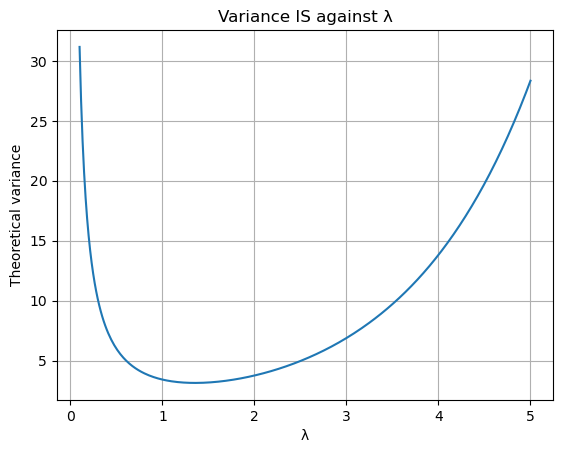

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar

lambdas = np.linspace(0.1, 5, 300)
f = (np.exp(lambdas + 2) - 1) / (lambdas * (lambdas + 2)) - (np.e - 1)**2

plt.plot(lambdas, f)
plt.xlabel("λ")
plt.ylabel("Theoretical variance")
plt.title("Variance IS against λ")
plt.grid(True)
plt.show()

Exercise 9

In [30]:
from scipy.stats import pareto

import matplotlib.pyplot as plt

# Parameters for the Pareto distribution
b = 2.62  # shape parameter
size = 1000

# Generate Pareto samples
pareto_samples = pareto.rvs(b, size=size)

mean_par = np.mean(pareto_samples)
print(mean_par)



1.550241976377617
